In [9]:
from covariant_integrator_library import *
from bunch_inits import *
from plotting_variables import *

font_size = 16
# Update the rcParams dictionary to set the font size globally
plt.rcParams.update({'font.size': font_size})

### Call the LW integrator. Two energy loss plots will be generated for each run as a sanity check. Final plot is calculated below, with a cell for inputting warpx results.

E_MeV =  4006551.8394184313
Gamma =  4269.620571054136
E_rest =  938.385948501337
E_MeV =  -4006540.953123652
Gamma =  21.531836275617284
E_rest =  186276.2114931421
2.45e-08
172.41828142954597
driver fractional energy shift [0.36140442]
rider fractional energy shift [0.99985441]


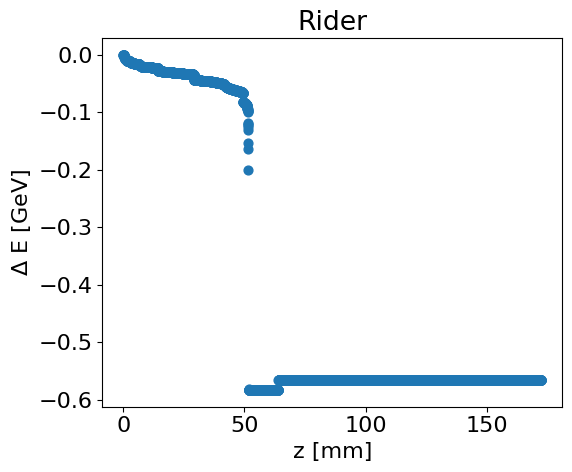

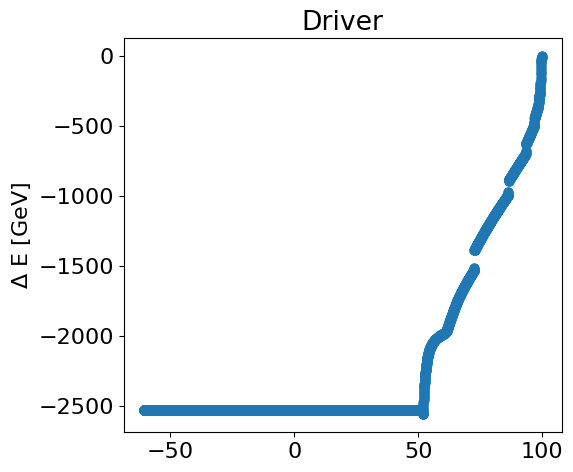

E_MeV =  3878739.783786368
Gamma =  4133.416430087338
E_rest =  938.385948501337
E_MeV =  -3878725.055442377
Gamma =  20.846437751070283
E_rest =  186276.2114931421
3.1e-08
211.20215115344888
driver fractional energy shift [0.36140442 0.36150646]
rider fractional energy shift [0.99985441 0.99992539]


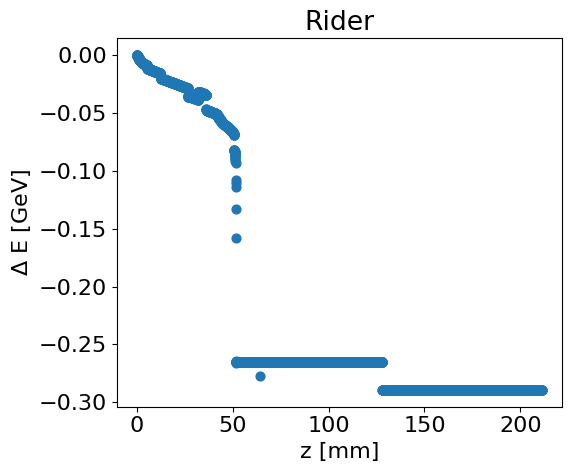

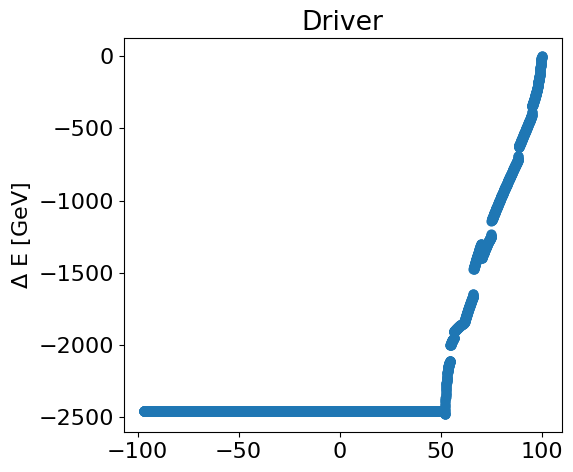

E_MeV =  3750927.5851773466
Gamma =  3997.212137018757
E_rest =  938.385948501337
E_MeV =  -3750906.1311772303
Gamma =  20.161075025697375
E_rest =  186276.2114931421
3.75e-08
247.06751537787088
driver fractional energy shift [0.36140442 0.36150646 0.38211175]
rider fractional energy shift [0.99985441 0.99992539 0.99988598]


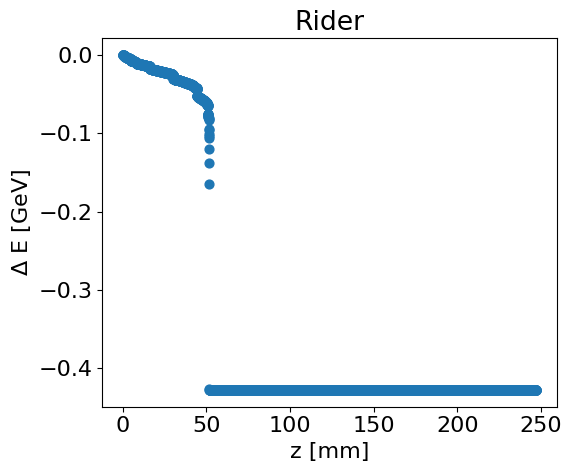

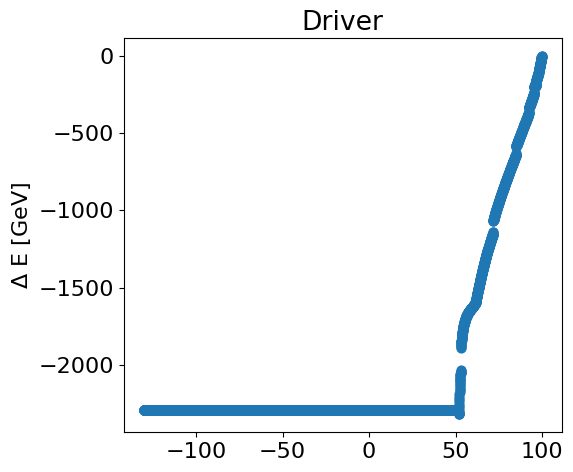

E_MeV =  3623115.69348195
Gamma =  3861.008171306429
E_rest =  938.385948501337
E_MeV =  -3623094.231369025
Gamma =  19.475807482785825
E_rest =  186276.2114931421
4.4e-08
280.01440393300936
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158]


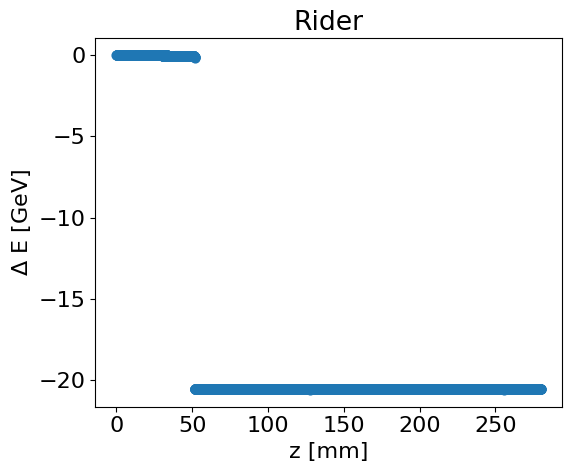

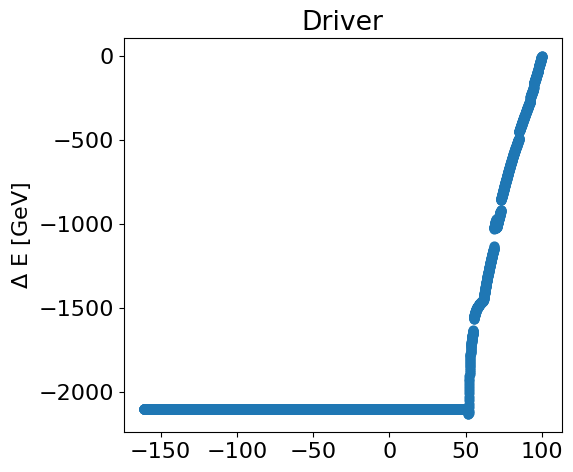

E_MeV =  3495303.2550008465
Gamma =  3724.803623229398
E_rest =  938.385948501337
E_MeV =  -3495243.78572161
Gamma =  18.79039711327147
E_rest =  186276.2114931421
5.0499999999999996e-08
310.04275173566083
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614]


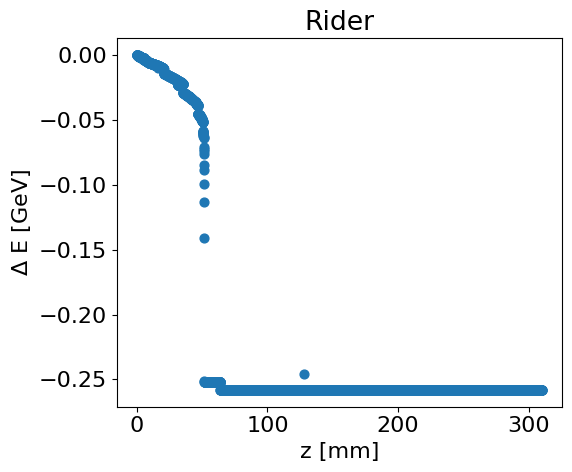

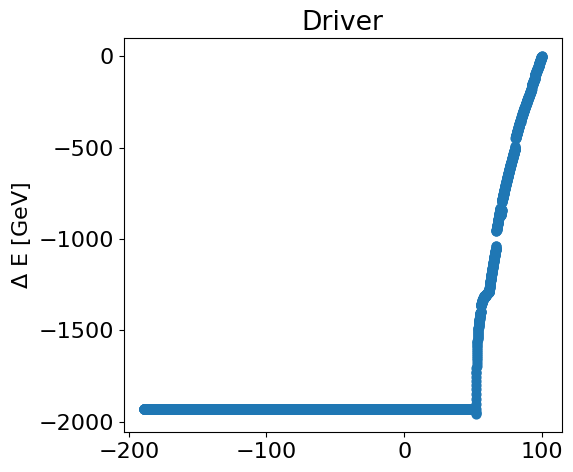

E_MeV =  3367491.217872912
Gamma =  3588.5995032176716
E_rest =  938.385948501337
E_MeV =  -3367445.916724539
Gamma =  18.105339662281256
E_rest =  186276.2114931421
5.700000000000001e-08
337.1526347403502
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806]


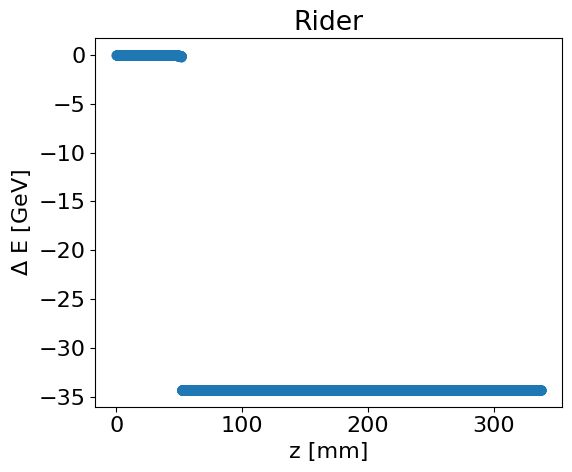

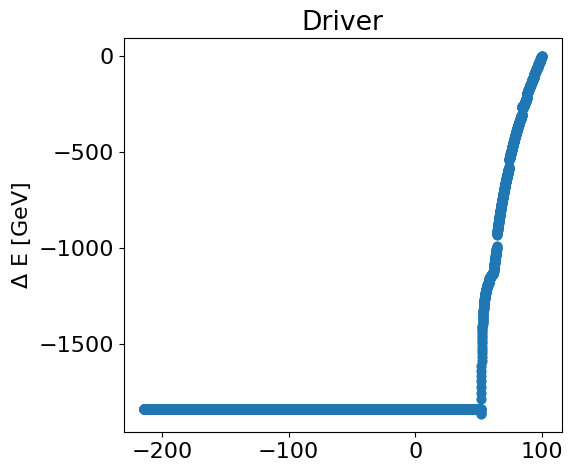

E_MeV =  3239679.266684249
Gamma =  3452.395475189957
E_rest =  938.385948501337
E_MeV =  -3239644.973147106
Gamma =  17.420345153781113
E_rest =  186276.2114931421
6.35e-08
361.3440318998245
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375 ]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222]


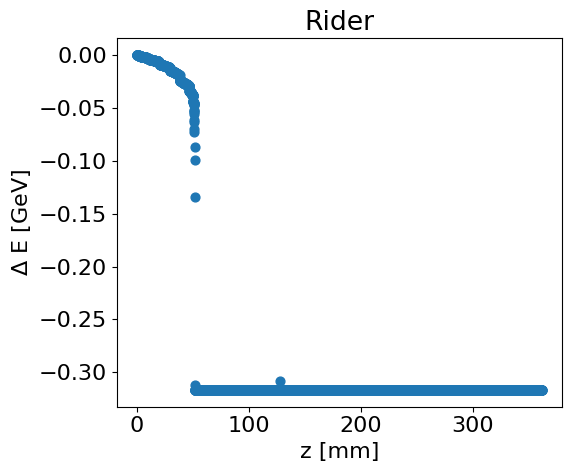

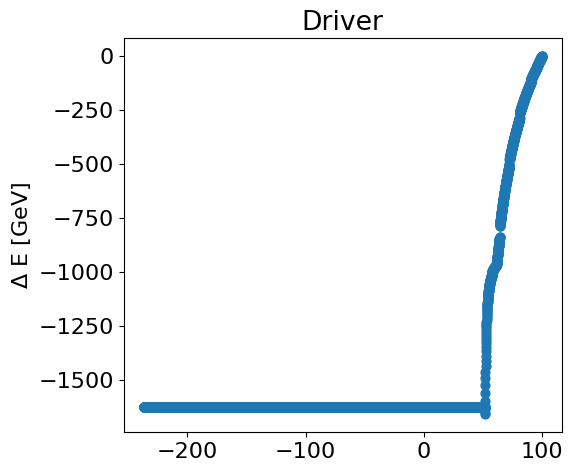

E_MeV =  3111867.087967948
Gamma =  3316.19120514678
E_rest =  938.385948501337
E_MeV =  -3111833.3265241613
Gamma =  16.73538246734296
E_rest =  186276.2114931421
7e-08
382.61690727394927
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492]


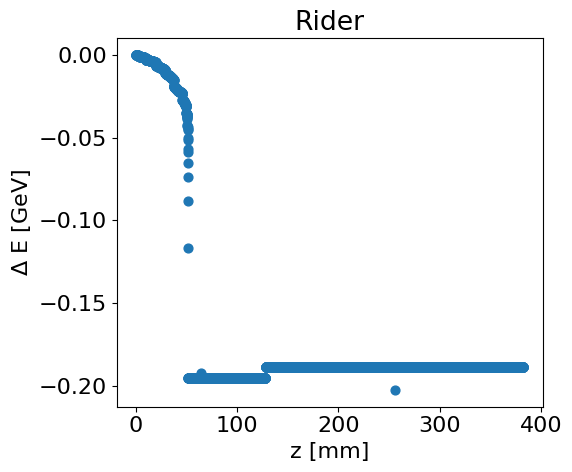

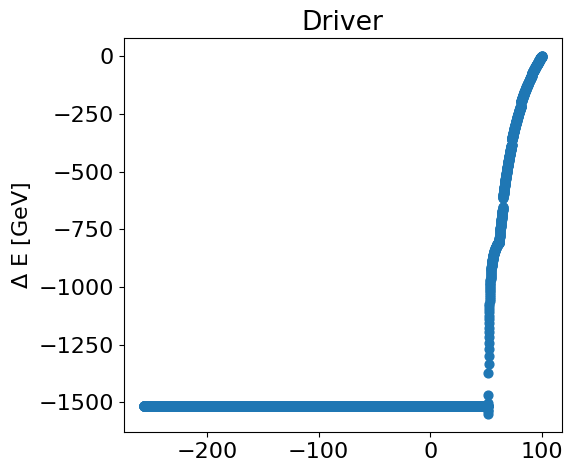

E_MeV =  2984054.9463967495
Gamma =  3179.9869751971955
E_rest =  938.385948501337
E_MeV =  -2984037.228832147
Gamma =  16.050603702429168
E_rest =  186276.2114931421
7.65e-08
400.9712887467665
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533]


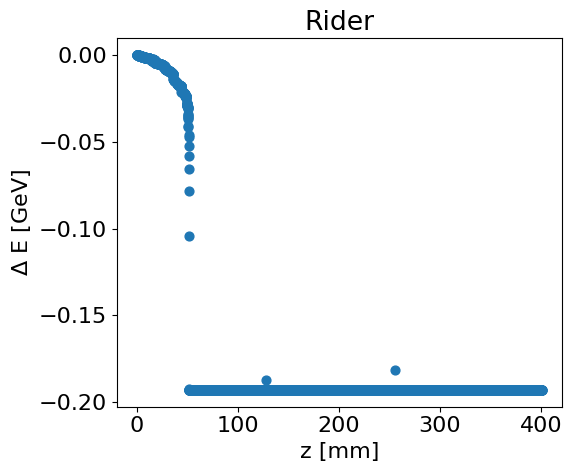

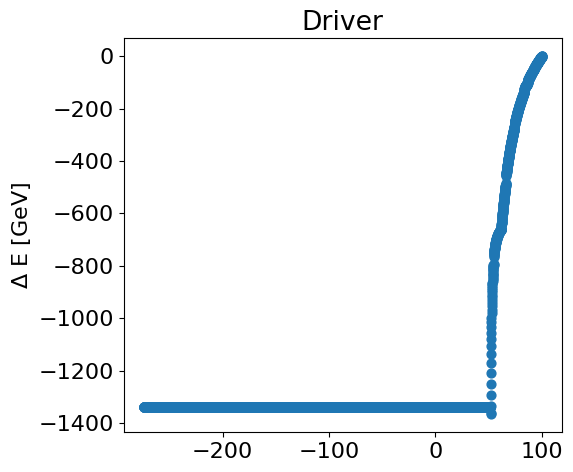

E_MeV =  2856242.592952595
Gamma =  3043.7825200411394
E_rest =  938.385948501337
E_MeV =  -2856230.026400943
Gamma =  15.365879484107408
E_rest =  186276.2114931421
8.3e-08
416.40714128685875
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768]


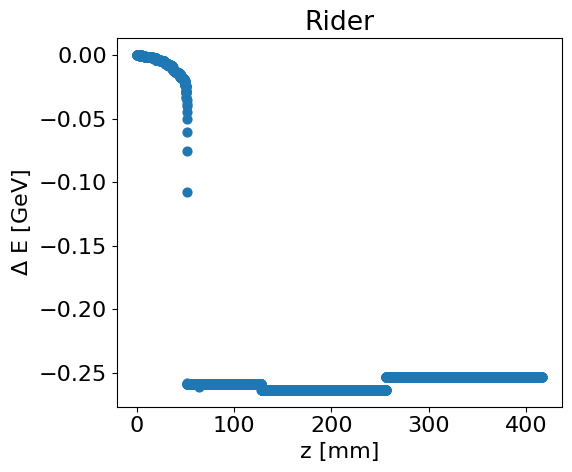

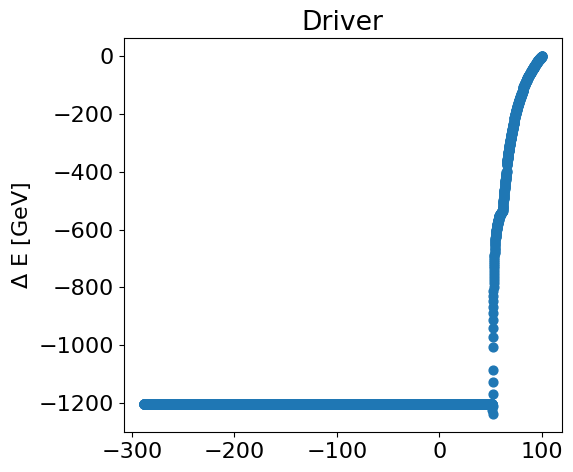

E_MeV =  2728430.705453226
Gamma =  2907.578562082783
E_rest =  938.385948501337
E_MeV =  -2728391.7711077216
Gamma =  14.681118962328233
E_rest =  186276.2114931421
8.95e-08
428.9245641947787
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239 ]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516]


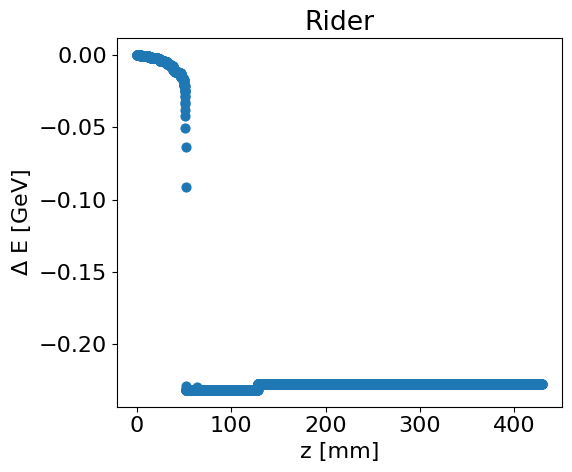

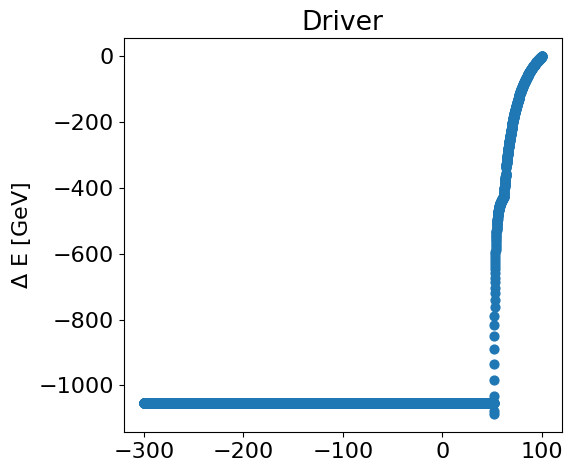

E_MeV =  2600618.346545726
Gamma =  2771.3741025202357
E_rest =  938.385948501337
E_MeV =  -2600563.8554744897
Gamma =  13.996562973242748
E_rest =  186276.2114931421
9.600000000000001e-08
438.52341526666066
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464 ]


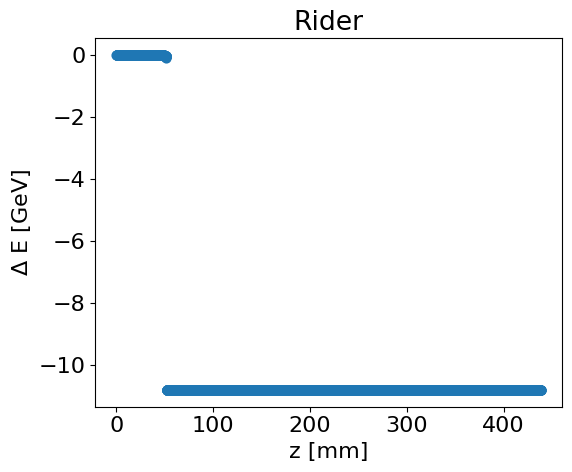

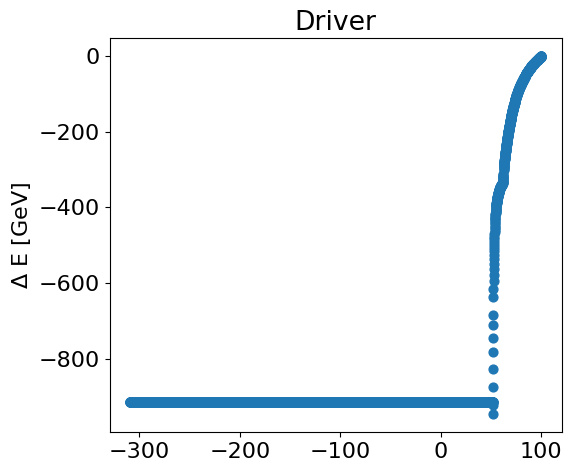

E_MeV =  2472806.4096553475
Gamma =  2635.1700935579242
E_rest =  938.385948501337
E_MeV =  -2472777.4755811393
Gamma =  13.312401485003155
E_rest =  186276.2114931421
1.0250000000000001e-07
445.20383951693236
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586]


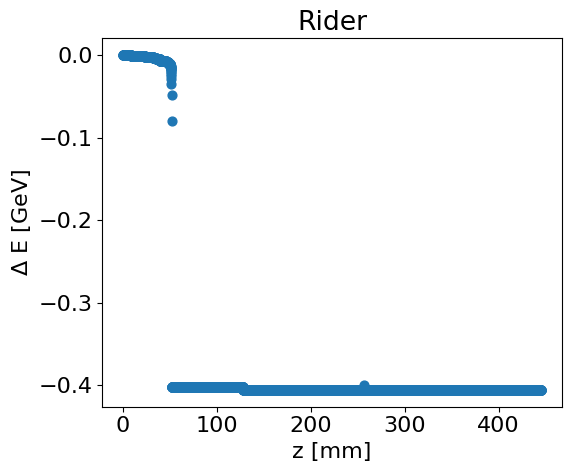

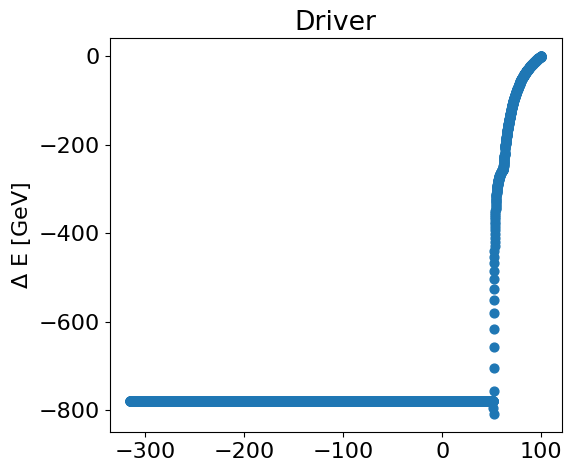

E_MeV =  2344994.1340708984
Gamma =  2498.9657246795728
E_rest =  938.385948501337
E_MeV =  -2344986.215859173
Gamma =  12.628413883092522
E_rest =  186276.2114931421
1.0900000000000001e-07
448.9657049490064
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534]


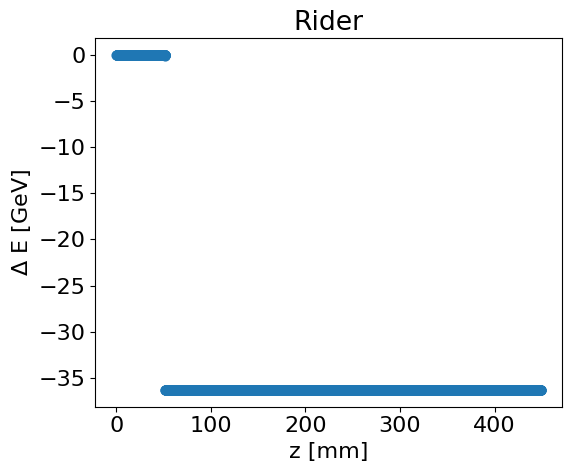

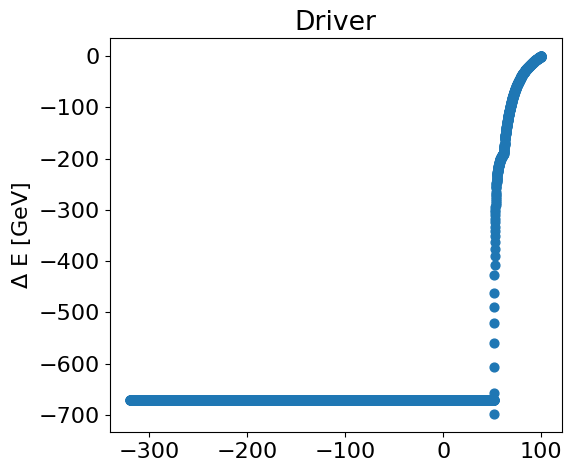

E_MeV =  2217182.1797688645
Gamma =  2362.761699371203
E_rest =  938.385948501337
E_MeV =  -2217161.8258825867
Gamma =  11.944483426805949
E_rest =  186276.2114931421
1.1550000000000001e-07
449.8091354637739
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798]


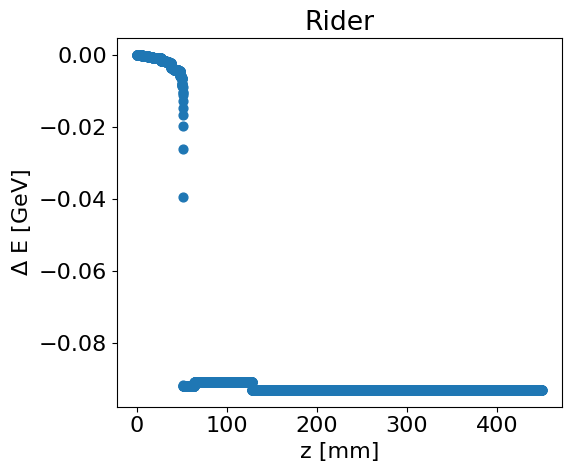

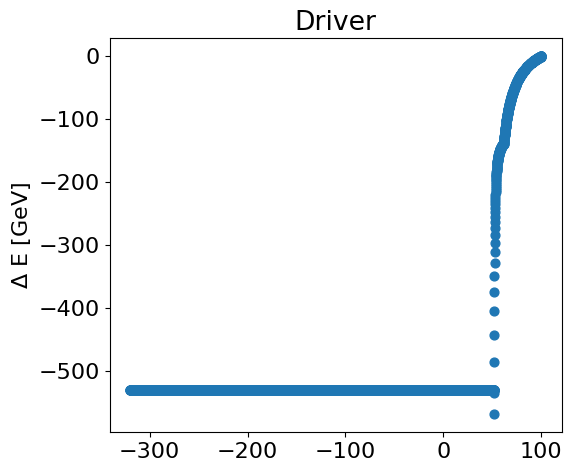

E_MeV =  2089370.0432809433
Gamma =  2226.557481325838
E_rest =  938.385948501337
E_MeV =  -2089335.7175478523
Gamma =  11.260821007993794
E_rest =  186276.2114931421
1.22e-07
447.73403266521296
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241]


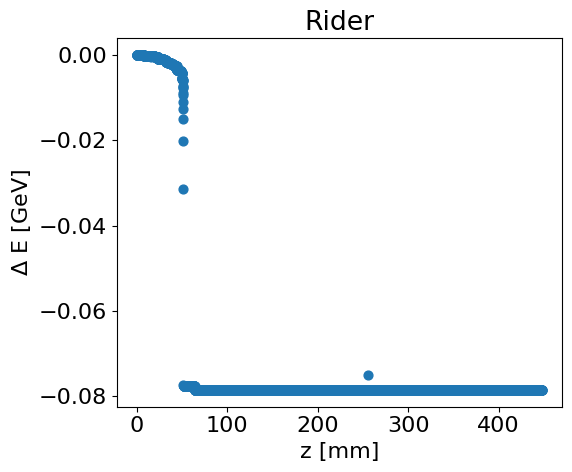

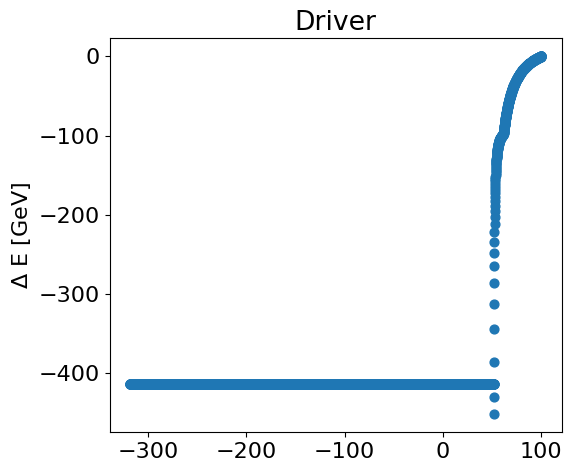

E_MeV =  1961557.8759579747
Gamma =  2090.353232107784
E_rest =  938.385948501337
E_MeV =  -1961523.4642773313
Gamma =  10.577563624460714
E_rest =  186276.2114931421
1.285e-07
442.7404249796057
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673 ]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186]


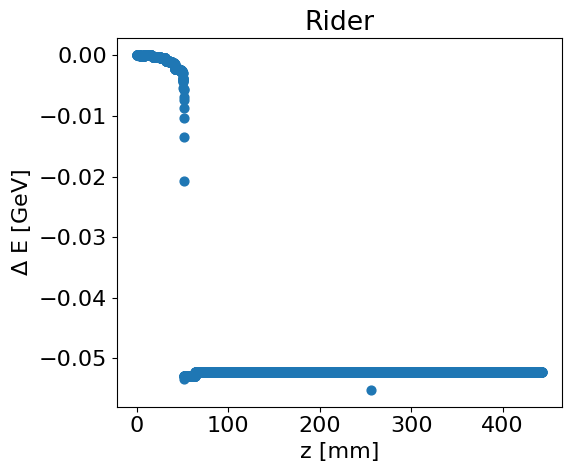

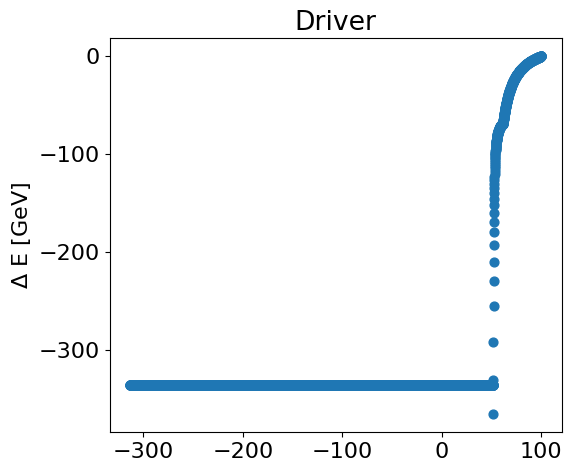

E_MeV =  1833745.6783631681
Gamma =  1954.1489526699768
E_rest =  938.385948501337
E_MeV =  -1833721.622906834
Gamma =  9.894761319516258
E_rest =  186276.2114931421
1.35e-07
434.8283114829308
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673  0.84933303]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186 0.99996027]


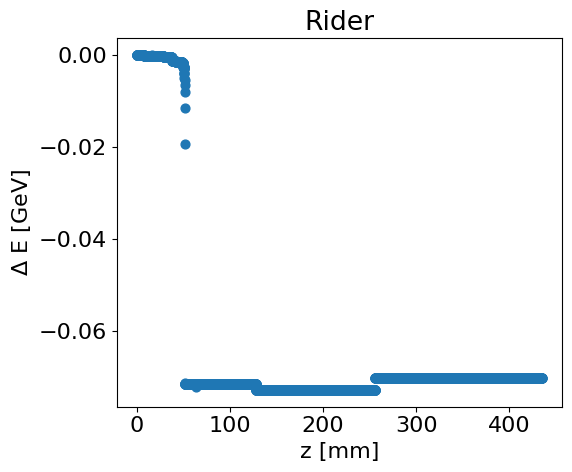

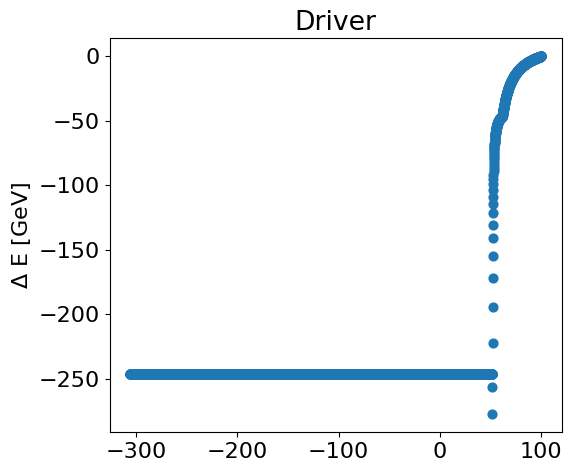

E_MeV =  1705933.485072753
Gamma =  1817.9446803173644
E_rest =  938.385948501337
E_MeV =  -1705894.0747686883
Gamma =  9.212310039853707
E_rest =  186276.2114931421
1.4150000000000002e-07
423.9976997306512
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673  0.84933303
 0.87901615]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186 0.99996027
 0.99990877]


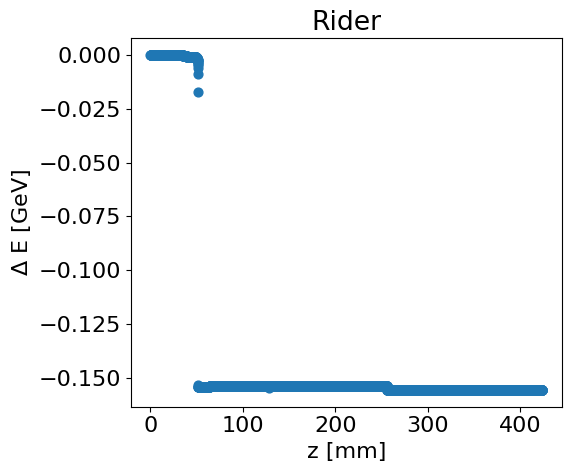

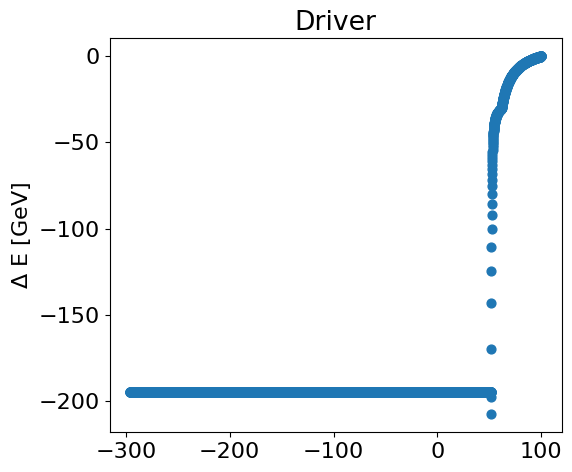

E_MeV =  1578121.3804520534
Gamma =  1681.7405055616318
E_rest =  938.385948501337
E_MeV =  -1578091.6980607756
Gamma =  8.530598590580984
E_rest =  186276.2114931421
1.48e-07
410.24861181154205
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673  0.84933303
 0.87901615 0.90808346]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186 0.99996027
 0.99990877 0.99998473]


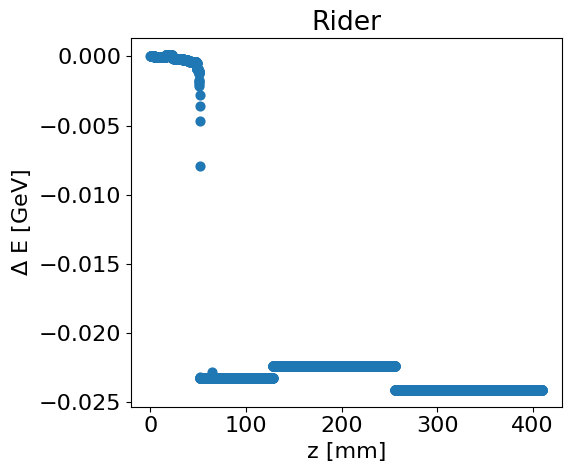

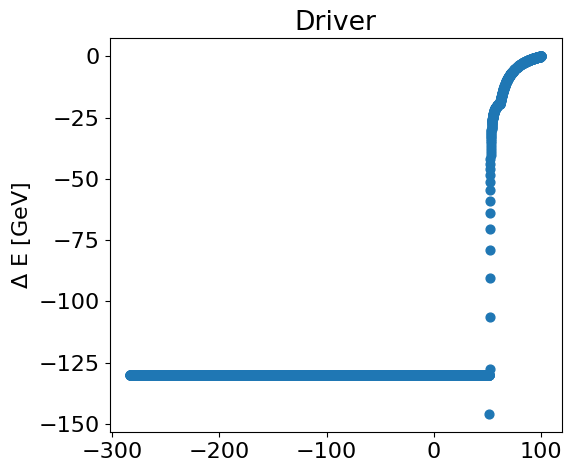

E_MeV =  1450309.3404080372
Gamma =  1545.5364035487546
E_rest =  938.385948501337
E_MeV =  -1450281.2379018473
Gamma =  7.8496072221247495
E_rest =  186276.2114931421
1.5450000000000001e-07
393.5810440854204
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673  0.84933303
 0.87901615 0.90808346 0.933726  ]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186 0.99996027
 0.99990877 0.99998473 0.99821887]


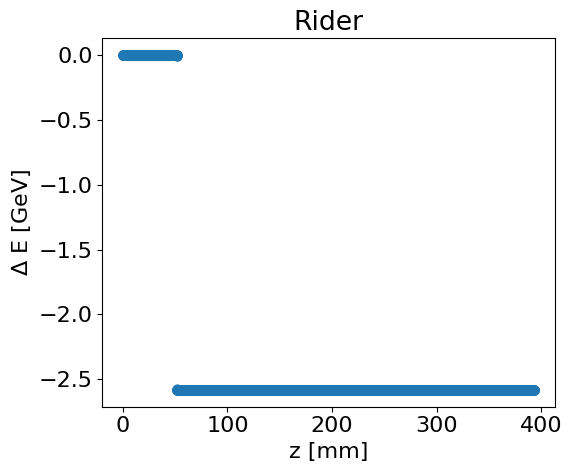

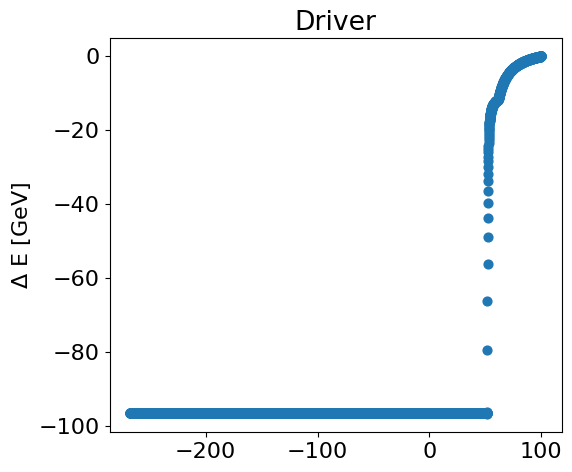

E_MeV =  1322497.2127074734
Gamma =  1409.3322131882694
E_rest =  938.385948501337
E_MeV =  -1322485.0526635598
Gamma =  7.16967243945174
E_rest =  186276.2114931421
1.61e-07
373.9949561004231
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673  0.84933303
 0.87901615 0.90808346 0.933726   0.95215408]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186 0.99996027
 0.99990877 0.99998473 0.99821887 0.99999317]


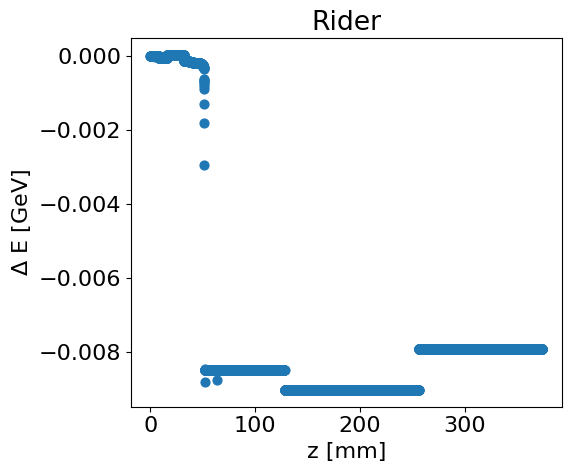

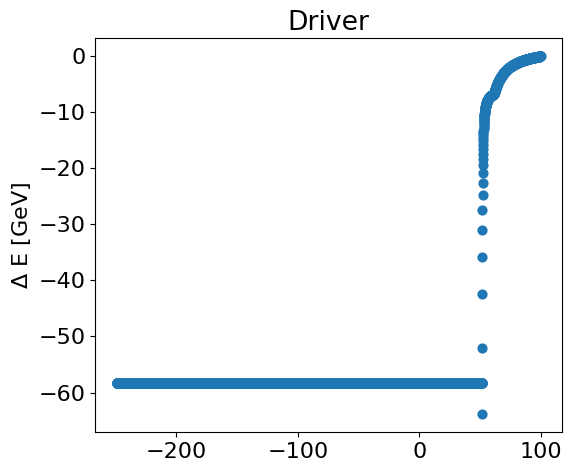

E_MeV =  1194684.9582787573
Gamma =  1273.1278944686037
E_rest =  938.385948501337
E_MeV =  -1194662.3069125025
Gamma =  6.490885376796571
E_rest =  186276.2114931421
1.675e-07
351.4903329754877
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673  0.84933303
 0.87901615 0.90808346 0.933726   0.95215408 0.96590823]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186 0.99996027
 0.99990877 0.99998473 0.99821887 0.99999317 0.9999913 ]


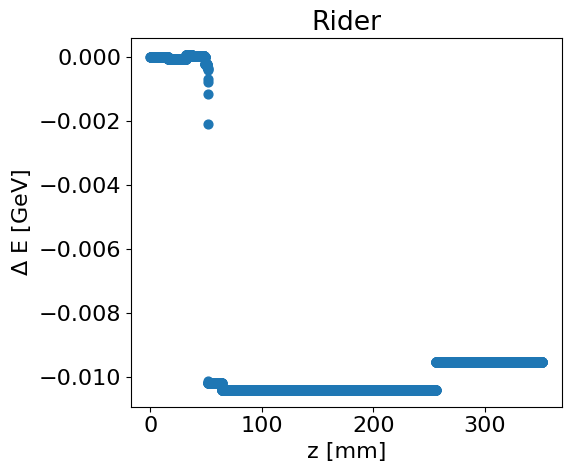

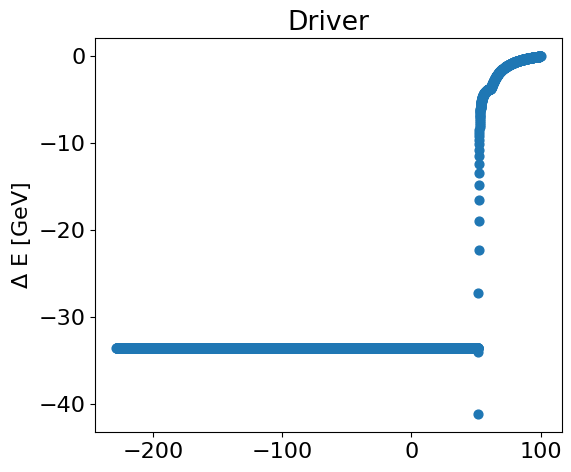

E_MeV =  1066872.8658755273
Gamma =  1136.9237575071045
E_rest =  938.385948501337
E_MeV =  -1066828.7639209712
Gamma =  5.813781914149185
E_rest =  186276.2114931421
1.7400000000000002e-07
326.0672587497886
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673  0.84933303
 0.87901615 0.90808346 0.933726   0.95215408 0.96590823 0.97825515]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186 0.99996027
 0.99990877 0.99998473 0.99821887 0.99999317 0.9999913  0.99999478]


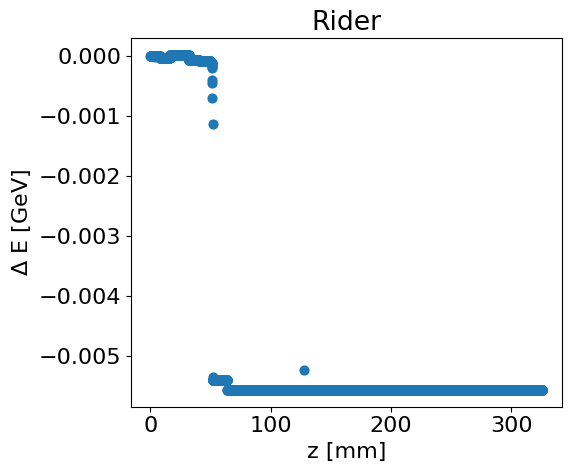

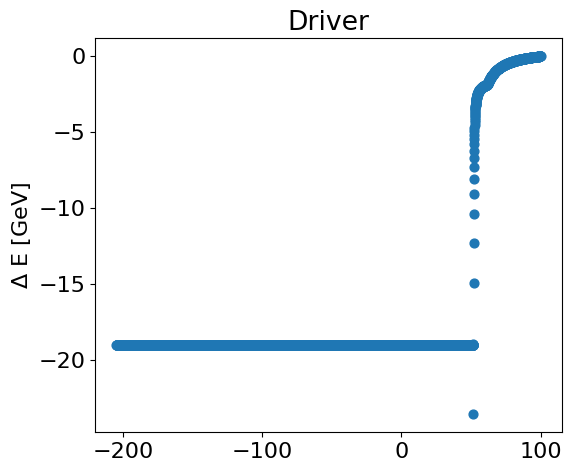

E_MeV =  939060.7067060967
Gamma =  1000.7195622031194
E_rest =  938.385948501337
E_MeV =  -939008.8070194089
Gamma =  5.13917919124098
E_rest =  186276.2114931421
1.805e-07
297.72566643515086
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673  0.84933303
 0.87901615 0.90808346 0.933726   0.95215408 0.96590823 0.97825515
 0.98686669]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186 0.99996027
 0.99990877 0.99998473 0.99821887 0.99999317 0.9999913  0.99999478
 0.99999689]


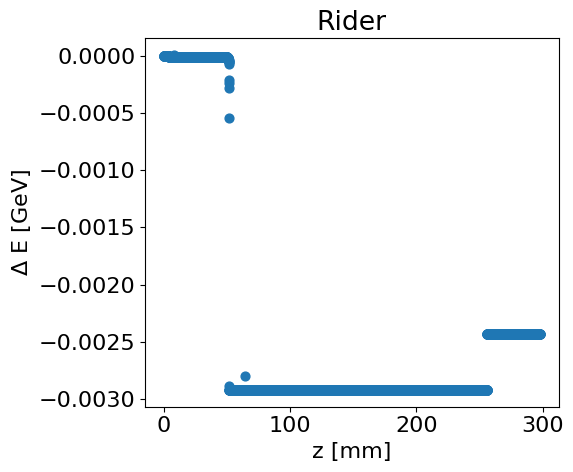

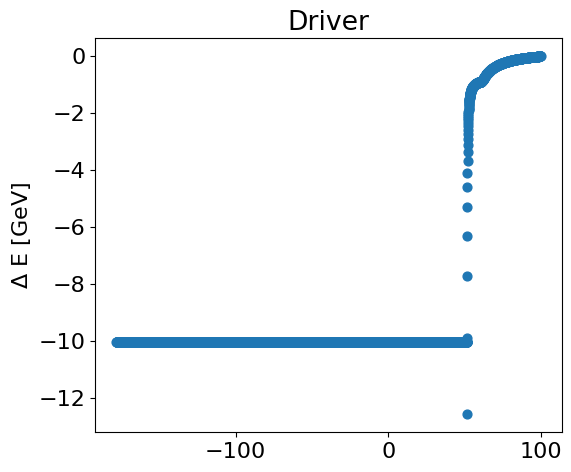

E_MeV =  811248.6534207453
Gamma =  864.5154985964532
E_rest =  938.385948501337
E_MeV =  -811242.5448646055
Gamma =  4.468386278407149
E_rest =  186276.2114931421
1.8700000000000002e-07
266.46561045377246
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673  0.84933303
 0.87901615 0.90808346 0.933726   0.95215408 0.96590823 0.97825515
 0.98686669 0.99261612]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186 0.99996027
 0.99990877 0.99998473 0.99821887 0.99999317 0.9999913  0.99999478
 0.99999689 0.99999792]


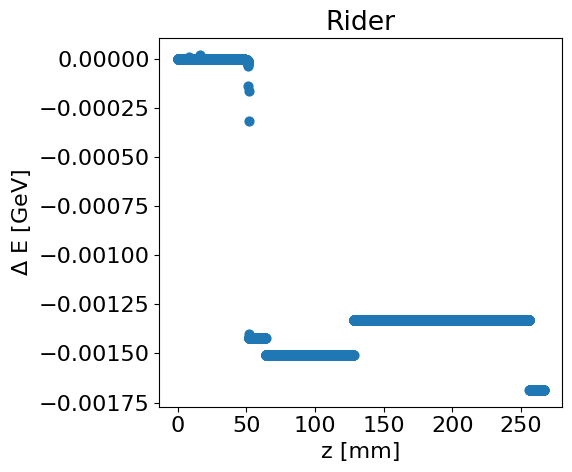

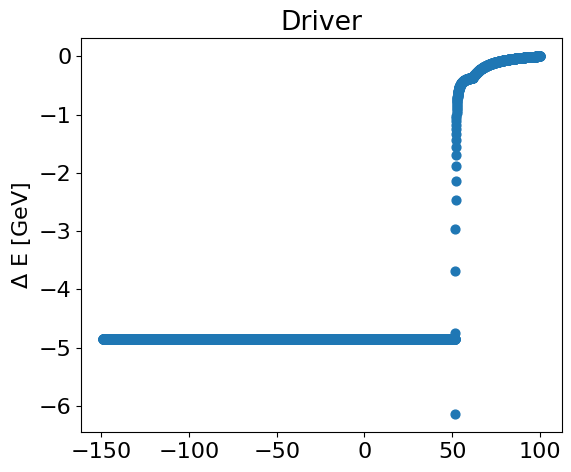

E_MeV =  683436.2262861138
Gamma =  728.3110660368327
E_rest =  938.385948501337
E_MeV =  -683421.8784770383
Gamma =  3.80270362504457
E_rest =  186276.2114931421
1.935e-07
232.28693138085762
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673  0.84933303
 0.87901615 0.90808346 0.933726   0.95215408 0.96590823 0.97825515
 0.98686669 0.99261612 0.99628505]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186 0.99996027
 0.99990877 0.99998473 0.99821887 0.99999317 0.9999913  0.99999478
 0.99999689 0.99999792 0.99999895]


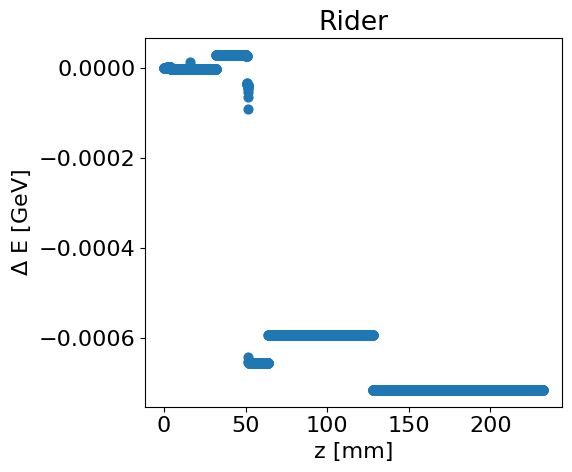

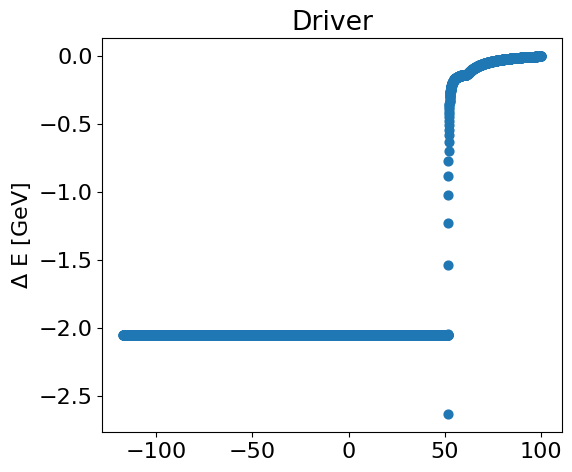

E_MeV =  555624.1954659034
Gamma =  592.1071055743882
E_rest =  938.385948501337
E_MeV =  -555564.5674148872
Gamma =  3.1456590228945824
E_rest =  186276.2114931421
2.0000000000000002e-07
195.18988696034708
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673  0.84933303
 0.87901615 0.90808346 0.933726   0.95215408 0.96590823 0.97825515
 0.98686669 0.99261612 0.99628505 0.9983747 ]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186 0.99996027
 0.99990877 0.99998473 0.99821887 0.99999317 0.9999913  0.99999478
 0.99999689 0.99999792 0.99999895 0.99996551]


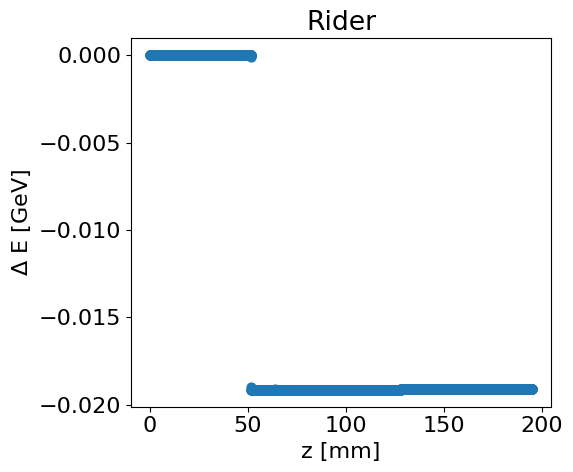

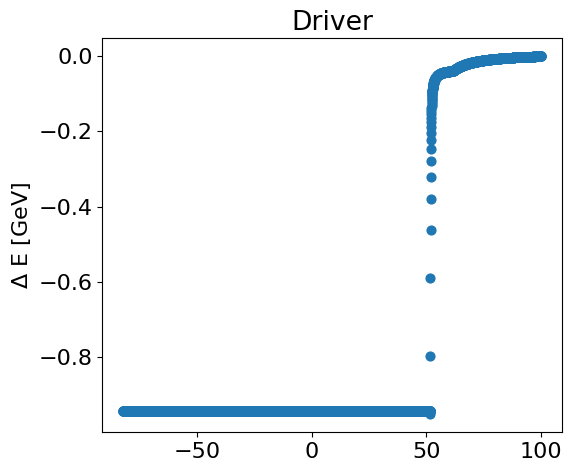

E_MeV =  427812.09707205923
Gamma =  455.9031674622212
E_rest =  938.385948501337
E_MeV =  -427755.6531741707
Gamma =  2.5046417110124706
E_rest =  186276.2114931421
2.065e-07
155.17432252935183
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673  0.84933303
 0.87901615 0.90808346 0.933726   0.95215408 0.96590823 0.97825515
 0.98686669 0.99261612 0.99628505 0.9983747  0.99945777]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186 0.99996027
 0.99990877 0.99998473 0.99821887 0.99999317 0.9999913  0.99999478
 0.99999689 0.99999792 0.99999895 0.99996551 0.99999982]


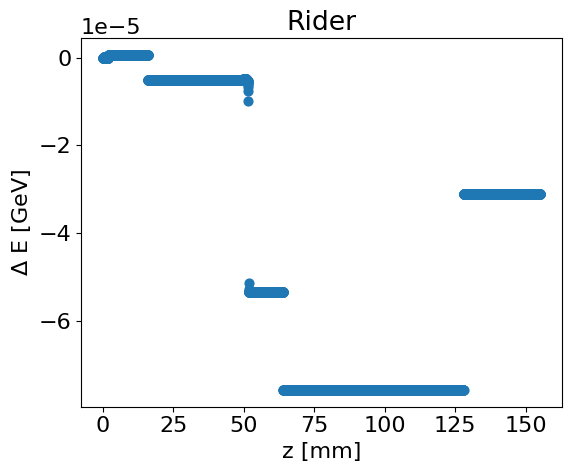

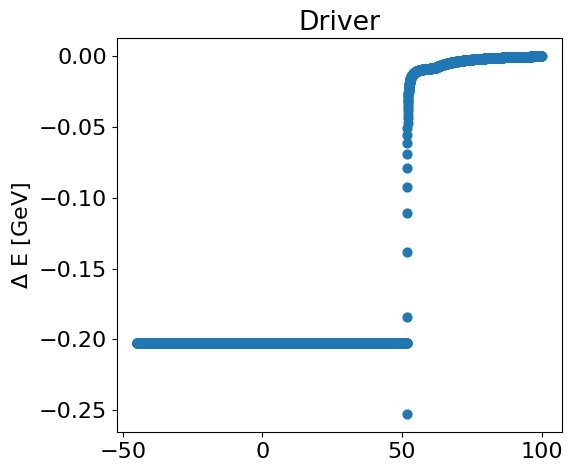

E_MeV =  299999.9707248321
Gamma =  319.6994145257124
E_rest =  938.385948501337
E_MeV =  -299983.5760366386
Gamma =  1.8956433299030588
E_rest =  186276.2114931421
2.1300000000000001e-07
112.24025057474364
driver fractional energy shift [0.36140442 0.36150646 0.38211175 0.41277192 0.44047678 0.44699066
 0.4887375  0.50239201 0.54311624 0.56720842 0.6021239  0.63687167
 0.67362798 0.70286773 0.74418037 0.78468759 0.8145673  0.84933303
 0.87901615 0.90808346 0.933726   0.95215408 0.96590823 0.97825515
 0.98686669 0.99261612 0.99628505 0.9983747  0.99945777 0.99986171]
rider fractional energy shift [0.99985441 0.99992539 0.99988598 0.99431158 0.99992614 0.98980806
 0.99990222 0.99993492 0.99993533 0.99990768 0.99991516 0.9958464
 0.99983586 0.98450534 0.99995798 0.99996241 0.99997186 0.99996027
 0.99990877 0.99998473 0.99821887 0.99999317 0.9999913  0.99999478
 0.99999689 0.99999792 0.99999895 0.99996551 0.99999982 0.9999986 ]


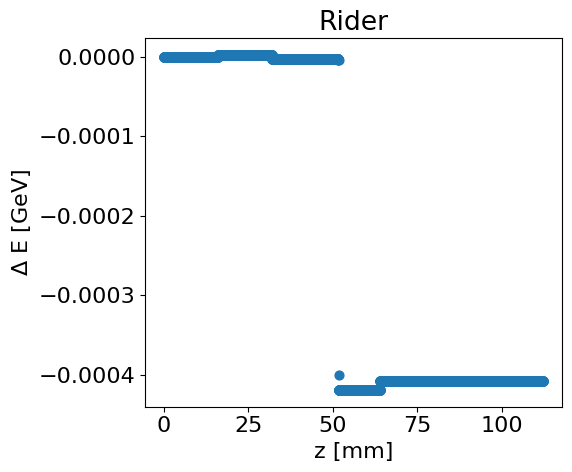

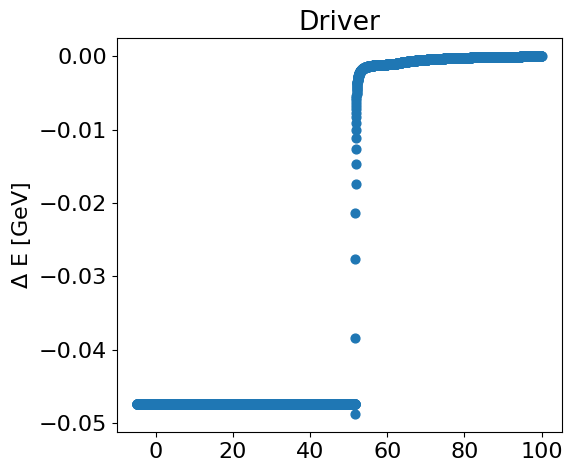

In [68]:
c_ms = 299792458

transv_dist = 1e-4

m_particle_rider = 1.007319468  #proton -amu
#m_particle_driver = 207.2 #lead, amu
m_particle_driver = 199.96 # gold
#m_particle = 0.0005485   #electron -amu
#m_particle_driver = 315 #gold hexafloride, amu

stripped_ions_rider = 1.
stripped_ions_driver = 79.
charge_sign_rider= 1.
charge_sign_driver = 1.
Pz_list = np.linspace(9.584300885e5,9.584295e4,30)
min_dE_MeVs_rider = []
min_dE_MeVs_driver = []
fracs_E_rider = []
fracs_E_driver = []
gams = []
gams_drv = []
bets = []
bets_drv = []
        
for i in range(0,len(Pz_list)):
#for i in range(0,1):
        #Pz_list = np.linspace(9.584300885e5,9.584295e4,30)
        Pz_list = np.linspace(1.28e6,9.584295e4,30)
        
        starting_Pz_rider = Pz_list[i]   #3.25E5 corresponds to 1 TeV
        
        starting_Pz_driver = -starting_Pz_rider/m_particle_driver*m_particle_rider  #actually velocity-like, mass factored later
        transv_mom_rider = 1e-6   #1e-2 is roughly 10keV scale
        transv_mom_driver = transv_mom_rider#*207 # lazy adding lead mass
        starting_distance_rider = 1e-3
        starting_distance_driver = 100.

        sim_type = 2    # type 2 used here, it is for bunch--bunch simulations
        pcount_rider = 1    #bunch counts
        pcount_driver = 1

        init_rider, E_MeV_rest_rider = init_bunch(starting_distance_rider,transv_mom_rider,starting_Pz_rider,stripped_ions_rider,m_particle_rider,transv_dist,pcount_rider,charge_sign_rider)

        init_driver, E_MeV_rest_driver = init_bunch(starting_distance_driver,transv_mom_driver,starting_Pz_driver,stripped_ions_driver,m_particle_driver,-transv_dist,pcount_driver,charge_sign_driver)


        #### parameters not used in this test, but required to run integrator
        bunch_dist = 1E5   #bunch--bunch distance at which the driver bunch has maximum charge (gaussian mean)
        cav_spacing = 1E5  #distance to the subsequent driver bunch
        aperture = 1E5 #this parameter reused for bunch-driven gaussian sigma
        z_cutoff = 0
        wall_pos= 1E5


        #coarse initialization
        # static_steps = 1#set init_steps equal to tot_steps to test static integrator only
        # ret_steps = 25
        # step_size = 2e-6

        #interaction zone
        static_steps = 1
        ret_steps = 5500
        #step_size = 1e-7 #+ 2.3e-6 / ( (i+1) / (25) )
        step_size = 1.8e-8 + (i+1)*6.5e-9 
        print(step_size)
        
        retarded_traj,retarded_drv_traj = retarded_integrator3(static_steps,ret_steps,step_size,wall_pos,aperture,sim_type,init_rider,init_driver,bunch_dist,cav_spacing,z_cutoff)#just use retarded_intergrator2 for retarded calcs
        #retarded_traj,retarded_drv_traj = retarded_integrator3(static_steps,ret_steps,step_size,wall_pos,aperture,sim_type,retarded_traj_pre[-1],retarded_drv_traj_pre[-1],bunch_dist,cav_spacing,z_cutoff)#just use retarded_intergrator2 for retarded calcs
        #retarded_traj,retarded_drv_traj = retarded_traj2,retarded_drv_traj2

        delta_e, delta_e_drv, tot_e, tot_e_drv, delta_e_keV, delta_e_MeV, tot_e_GeV, delta_e_keV_drv, delta_e_MeV_drv, tot_e_GeV_drv, zs, xs, zs_drv, xs_drv, bzs, bxs, bys, bdotxs, bdotys, bdotzs, Pzs, Pxs, Pys, Pts, gammas, tees, bzs_drv, bxs_drv, bys_drv, bdotxs_drv, bdotys_drv, bdotzs_drv, Pzs_drv, Pxs_drv, Pys_drv, Pts_drv, gammas_drv, tees_drv, qs_drv, gam_fixed, bdotzs_seconds, q_statC_squared, q_kg_m3_sneg2, Pows_z_rider_watts = calculate_plotting_variables(retarded_traj,
        retarded_drv_traj, init_rider, init_driver, static_steps, ret_steps, E_MeV_rest_rider, E_MeV_rest_driver, c_ms)
        min_dE_MeVs_rider = np.append(min_dE_MeVs_rider,np.min(delta_e_MeV))
        min_dE_MeVs_driver = np.append(min_dE_MeVs_driver,np.min(delta_e_MeV_drv))
        # max_dE_MeVs_rider = np.append(max_dE_MeVs_rider,np.max(np.abs(delta_e_MeV)))
        # max_dE_MeVs_driver = np.append(max_dE_MeVs_driver,np.max(np.abs(delta_e_MeV_drv)))
        print(zs[-1])
        frac_E_rider = np.divide(np.min(tot_e),tot_e[0])
        frac_E_driver = np.divide(np.min(tot_e_drv),tot_e_drv[0])
        fracs_E_rider = np.append(fracs_E_rider,frac_E_rider)
        fracs_E_driver = np.append(fracs_E_driver,frac_E_driver)
        print("driver fractional energy shift", fracs_E_driver)
        print("rider fractional energy shift", fracs_E_rider)
        gams = np.append(gams,gammas[0])
        gams_drv = np.append(gams_drv,gammas_drv[0])
        bets = np.append(bets,bzs[0])
        bets_drv = np.append(bets_drv,bzs_drv[0])

        fig = plt.figure(figsize=(6,5))
        ax = fig.add_subplot(1, 1, 1) 
        ax.scatter(zs,delta_e_MeV/1000,s=40)
        #ax.scatter(zs_drv,delta_e_MeV_drv,s=40)
        #ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
        ax.set_ylabel(r"$\Delta$ E [GeV]")
        ax.set_xlabel(r"z [mm]")
        #ax.axvline(30,color='g',label="wall paosition")
        #plt.xlim(starting_distance_rider/2,3)
        #plt.ylim(1E-2,2e3)
        #plt.xscale('log')  #log scale works at 1mm range
        #plt.yscale('log')
        plt.title("Rider")
        plt.tight_layout()
        #plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
        plt.show()

        fig = plt.figure(figsize=(6,5))
        ax = fig.add_subplot(1, 1, 1) 
        #ax.scatter(zs,delta_e_MeV,s=40)
        ax.scatter(zs_drv,delta_e_MeV_drv/1000,s=40)
        #ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
        #ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
        ax.set_ylabel(r"$\Delta$ E [GeV]")
        #ax.set_xlabel(r"z [mm]")
        #ax.axvline(30,color='g',label="wall paosition")
        #plt.xlim(-0.54,0.01)
        #plt.ylim(1E-5,5e3)
        #plt.xscale('log')
        #plt.yscale('log')
        plt.title("Driver")
        plt.tight_layout()
        #plt.savefig("./6.26_prot_antiprot_10nm.png",dpi=600)
        plt.show()





In [11]:
amu_kg = 1.66053907E-27
c_ms = 299792458 # Speed of light in m/s
mass_kg = m_particle_driver*amu_kg
vz_mmns = Pz_list/(m_particle_driver*gammas_drv[0]) #NOT mass_kg here
vz_ms = vz_mmns*1e6
Pz_kgms  = vz_ms*mass_kg*gammas_drv[0]
E_J     = Pz_kgms*c_ms
E_MeV_drv = E_J*6.242E12

In [12]:
amu_kg = 1.66053907E-27
c_ms = 299792458 # Speed of light in m/s
mass_kg = m_particle_rider*amu_kg
vz_mmns = Pz_list/(m_particle_rider*gammas[0]) #NOT mass_kg here
vz_ms = vz_mmns*1e6
Pz_kgms  = vz_ms*mass_kg*gammas[0]
E_J     = Pz_kgms*c_ms
E_MeV = E_J*6.242E12

#### The following are for generating $\gamma \beta$ values to input into warpX

In [ ]:
gams

array([4269.62078913, 4133.41650007, 3997.2121981 , 3861.00797373,
       3724.80380718, 3588.59971099, 3452.39536695, 3316.19103757,
       3179.98673944, 3043.78270249, 2907.57833466, 2771.37405025,
       2635.16989086, 2498.96575536, 2362.76150055, 2226.55732903,
       2090.35307641, 1954.14878091, 1817.9446951 , 1681.74056557,
       1545.53620093, 1409.33218837, 1273.12775057, 1136.92363463,
       1000.71946602,  864.51540823,  728.31126812,  592.10707152,
        455.90314807,  319.69956194])

In [ ]:
gams_drv

array([21.52716686, 20.84182532, 20.15681464, 19.47199217, 18.78708295,
       18.10226235, 17.41782777, 16.73324177, 16.04863772, 15.3642613 ,
       14.67991242, 13.99599935, 13.31171867, 12.62790312, 11.94393832,
       11.26056918, 10.57753268,  9.8946439 ,  9.21221688,  8.53048191,
        7.84947475,  7.16963401,  6.49074164,  5.81387428,  5.13936285,
        4.46835993,  3.80260037,  3.14582326,  2.50473022,  1.8956086 ])

In [ ]:
gambets = np.multiply(bets,gams)

In [ ]:
gambets_drv = np.multiply(bets_drv,gams_drv)

In [ ]:
gambets

array([4269.62045599, 4133.4163007 , 3997.21198793, 3861.00802955,
       3724.80348361, 3588.59935616, 3452.39531806, 3316.19106089,
       3179.98682498, 3043.78235351, 2907.57838921, 2771.3739171 ,
       2635.16990428, 2498.96552235, 2362.7614881 , 2226.55726011,
       2090.35299642, 1954.14869654, 1817.94440739, 1681.74020964,
       1545.53608154, 1409.33185939, 1273.12750217, 1136.92331738,
       1000.7190624 ,  864.51492026,  728.31037941,  592.10626114,
        455.90207075,  319.69785055])

In [ ]:
-gambets_drv

array([21.50419414, 20.81799305, 20.1320049 , 19.4462004 , 18.76027159,
       18.07466015, 17.38903357, 16.70332762, 16.01766833, 15.3319043 ,
       14.64592503, 13.9599528 , 13.27415768, 12.58829472, 11.90221738,
       11.21609968, 10.53003061,  9.84399674,  9.15780874,  8.47174365,
        7.78562623,  7.09957915,  6.41338523,  5.72713062,  5.04094729,
        4.35505128,  3.66886273,  2.98247723,  2.29635147,  1.61042343])

### The outputs from the warpX gamma_parser.py should then be copied in the following cell

In [105]:
;pwd

'/home/benjamif/work/LW_integrator'

In [109]:
warpx_gams_start = np.loadtxt('/home/benjamif/work/warpx/proton_gold/saved_runs_alt/second_row_values.txt')
warpx_gams_end = np.loadtxt('/home/benjamif/work/warpx/proton_gold/saved_runs_alt/last_row_values.txt')


In [116]:
fracs_E_driver_warpx = np.flip(np.divide(warpx_gams_end, warpx_gams_start))
#fracs_E_driver_warpx = (np.divide(warpx_gams_end, warpx_gams_start))

In [117]:
fracs_E_driver_warpx

array([0.70134162, 0.64344177, 0.61244042, 0.46934221, 0.36136656,
       0.24553591, 0.24540782, 0.33524737, 0.44377434, 0.54585025,
       0.63532621, 0.71135248, 0.77470905, 0.82670472, 0.8687737 ,
       0.90232235, 0.92866972, 0.94901871, 0.96444524, 0.97589419,
       0.98418712, 0.99002525, 0.99399876, 0.99659441, 0.99820573,
       0.99914273, 0.99964222, 0.99987768, 0.99996976, 0.99999592])

In [118]:
fracs_E_driver

array([0.36140442, 0.36150646, 0.38211175, 0.41277192, 0.44047678,
       0.44699066, 0.4887375 , 0.50239201, 0.54311624, 0.56720842,
       0.6021239 , 0.63687167, 0.67362798, 0.70286773, 0.74418037,
       0.78468759, 0.8145673 , 0.84933303, 0.87901615, 0.90808346,
       0.933726  , 0.95215408, 0.96590823, 0.97825515, 0.98686669,
       0.99261612, 0.99628505, 0.9983747 , 0.99945777, 0.99986171])

In [119]:
fracs_E_rider

array([0.99985441, 0.99992539, 0.99988598, 0.99431158, 0.99992614,
       0.98980806, 0.99990222, 0.99993492, 0.99993533, 0.99990768,
       0.99991516, 0.9958464 , 0.99983586, 0.98450534, 0.99995798,
       0.99996241, 0.99997186, 0.99996027, 0.99990877, 0.99998473,
       0.99821887, 0.99999317, 0.9999913 , 0.99999478, 0.99999689,
       0.99999792, 0.99999895, 0.99996551, 0.99999982, 0.9999986 ])

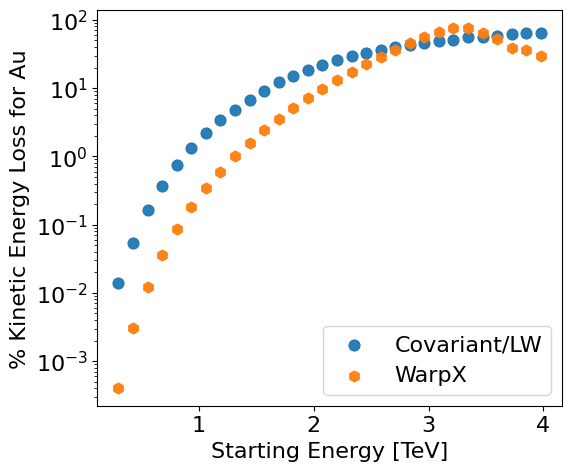

In [120]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1, 1, 1) 
#ax.scatter(zs,delta_e_MeV,s=40)
ax.scatter(E_MeV_drv/1e6,np.abs(fracs_E_driver-1)*100,s=60,label="Covariant/LW",alpha=0.95)
ax.scatter(E_MeV_drv/1e6,np.abs(fracs_E_driver_warpx-1)*100,s=60,marker='h',label="WarpX",alpha=0.95)

#ax.scatter(E_MeV/1e6,np.abs(fracs_E_rider-1)*100,s=40,label="p")
#ax.scatter(zs_drv,np.abs(delta_e_MeV_drv/1000),s=40)  #for log plotting
#ax.scatter(tees,np.abs(np.multiply(qs_drv,1E-2)),s=40)
ax.set_ylabel(r"% Kinetic Energy Loss for Au")
ax.set_xlabel(r"Starting Energy [TeV]")
#ax.axvline(30,color='g',label="wall paosition")
#plt.xlim(-0.54,0.01)
#plt.ylim(1E-5,5e3)
#plt.xscale('log')
plt.legend()
plt.yscale('log')
#plt.title("p$-$Au @ d$_T$=100nm")
plt.tight_layout()
#plt.savefig("./p_Au_energy_dependent.png",dpi=600)
plt.show()